<img src="Performance.jfif" width="450" height="300" align="right"/>

# Pandas Performance

by Christoph Guettner

**Abstract:** Here, time of different search performance in  
a Pandas Dataframe is compared. Therfore, a database with 100_000  
city names is loaded(loading time: 52sec) and a string method is applied  
in each row. The search methods are interrow(),search by index, search in  
dictionay, and last the apply method with a lamda function. 

**Results**: The fastes ways to do do operations in a large dataframe is by  
the pandas apply method. It is closed followed by the to_dict() method, which  
trun the data frame into a dictionary. The thrid place goes to searching by index,  
and the by fast slowest method is the iterrow method. 

## Table of Contents

* [Imports](#Imports)
* [Load Data]
* [Iterrow() Method]
* [Index]
* [Dictionary]
* [Apply() Method]
* [Results]


In [29]:
import time 
import sqlite3 as sql 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [30]:
def use_iterrow_method(city_table, city_sample):
    temp=[]
    for i,row in city_table.iloc[:int(city_sample)].iterrows():
        name_new = row['Ort'].strip()
        temp.append(name_new)
    return temp

def search_by_index(city_table,city_sample):
    temp=[]
    for idx in range(0,int(city_sample),1):
        name_new = city_table['Ort'].iloc[idx].strip()
        temp.append(name_new)
    return temp

def operate_in_dict(city_table, city_sample):
    df_dict = city_table.iloc[:int(city_sample)].to_dict('records')
    temp=[]
    for row in df_dict:
        name_new = row['Ort'].strip()
        temp.append(name_new)
    return temp

def use_apply_method(city_table, city_sample):
    temp = city_table['Ort'].iloc[:int(city_sample)].apply(lambda x: x.strip())
    return temp

def plot_results(x, Iterrow_Duration,Index_Duration, Dict_Duration, Apply_Duration ):
    plt.figure(figsize=(15, 5))
    plt.title('Performance Measure')
    plt.plot(x, Iterrow_Duration, label='Iterrow()')
    plt.plot(x, Index_Duration, label='Index')
    plt.plot(x, Dict_Duration, label='Dictionary')
    plt.plot(x, Apply_Duration, label='Apply')
    plt.xlabel('sample_size')
    plt.ylabel('time')
    plt.xlim(0,10_0000)
    plt.legend()

## Import Data

In [31]:
start = time.time()
conn = sql.Connection('Address_Database.db')
city_table = pd.read_sql('Select Ort from Adresse', conn)
end =time.time()
duration = end - start
conn.close()
print('time to load data in dataframe is: {:.4f}'.format(duration))


time to load data in dataframe is: 0.2417


In [32]:
x=list(np.linspace(5000,len(city_table), 20, endpoint=False))
n_cities = len(city_table)
n_cities

100000

## Iterrows() Method

In [33]:


Iterrow_Duration = []
for city_sample in x:
    start= time.time()
    
    use_iterrow_method(city_table, city_sample)

    end =time.time()
    duration = end - start
    Iterrow_Duration.append(duration)

##  Search by index

In [34]:
Index_Duration = []

for city_sample in x:
    start= time.time()
    search_by_index(city_table,city_sample)

    end =time.time()
    duration = end - start
    Index_Duration.append(duration)

## Search in Dictionary

In [35]:
Dict_Duration = []

for city_sample in x:
    start= time.time()
    operate_in_dict(city_table,city_sample)
    end =time.time()
    duration = end - start
    Dict_Duration.append(duration)

## Search by Apply() Method

In [36]:
Apply_Duration = []
for city_sample in x:
    start= time.time()
    use_apply_method(city_table, city_sample)
    end =time.time()
    duration = end - start
    Apply_Duration.append(duration)



## Show the Results

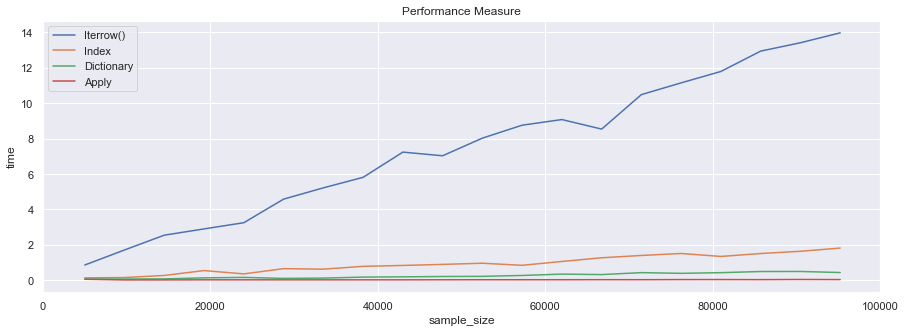

In [37]:
plot_results(x, Iterrow_Duration,Index_Duration, Dict_Duration, Apply_Duration )

